In [1]:
from NeuralNetwork import ANN
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv',header=None)
test_data = pd.read_csv('test.csv',header=None)
train_data = train_data.sample(n=600)
test_data = test_data.sample(n=100)
# test_data.sample(n=1)

In [3]:
X_train = train_data.iloc[:,1:].values / 255
y_train = train_data.iloc[:,0].values.reshape(X_train.shape[0],1)
X_test = test_data.iloc[:,1:].values / 255
y_test = test_data.iloc[:,0].values.reshape(X_test.shape[0],1)

In [4]:
lr = np.arange(10)
one_hot = []
for label in y_train.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_train = one_hot
one_hot = []
for label in y_test.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_test = one_hot

Target [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


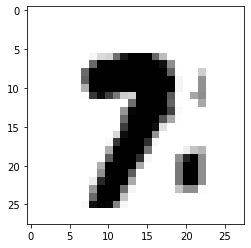

In [6]:
sample = 90
print("Target {}".format(y_train[sample]))
plt.imshow(X_train[sample].reshape(28,28),cmap='gray_r')
plt.show()

In [7]:
X_train_list = X_train.tolist()

In [8]:
model = ANN(784,[20],10,seed=5,weights_range=0.4)

In [9]:
model.fit(X=X_train_list,
          y=y_train,
          learning_rate=1.66,
          epochs=50,
          print_results=True)

Epoch ---  0  MSE :  0.9269185585976557
Epoch ---  1  MSE :  0.8128448241038708
Epoch ---  2  MSE :  0.7273003837118602
Epoch ---  3  MSE :  0.6418374805434428
Epoch ---  4  MSE :  0.566701491256721
Epoch ---  5  MSE :  0.5061987897998486
Epoch ---  6  MSE :  0.45887398629650455
Epoch ---  7  MSE :  0.4211573373422347
Epoch ---  8  MSE :  0.39007959462331
Epoch ---  9  MSE :  0.3637263471470263
Epoch ---  10  MSE :  0.3408962850562152
Epoch ---  11  MSE :  0.3207972568406649
Epoch ---  12  MSE :  0.3028806561165898
Epoch ---  13  MSE :  0.28675042172170806
Epoch ---  14  MSE :  0.2721123847641992
Epoch ---  15  MSE :  0.2587461560297605
Epoch ---  16  MSE :  0.24648615276543326
Epoch ---  17  MSE :  0.23520519389540634
Epoch ---  18  MSE :  0.22479966638876106
Epoch ---  19  MSE :  0.21517842828191552
Epoch ---  20  MSE :  0.2062572745536919
Epoch ---  21  MSE :  0.19795798528304512
Epoch ---  22  MSE :  0.1902093097206378
Epoch ---  23  MSE :  0.1829478442892084
Epoch ---  24  MSE :  

Target 7
Target [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


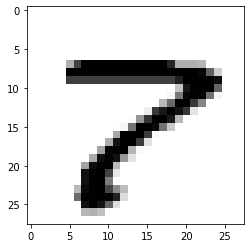

In [10]:
sample = 28
y_pred = model.predict(X_test[sample].reshape(1,784)).ravel()
print("Target {}".format(np.argmax(y_pred)))
print("Target {}".format(y_test[sample]))
plt.imshow(X_test[sample].reshape(28,28),cmap='gray_r')
plt.show()

In [11]:
correct_count = 0
for train_sample_X, train_sample_y in zip(X_train,y_train):
    y_pred = model.predict(train_sample_X.reshape(1,784)).ravel()
    temp = [0]*10
    temp[np.argmax(y_pred)] = 1
    if temp == train_sample_y:
        correct_count += 1
print('Training accuracy: ',correct_count/X_train.shape[0])

Training accuracy:  0.9666666666666667


In [12]:
correct_count = 0
for test_sample_X, test_sample_y in zip(X_test,y_test):
    y_pred = model.predict(test_sample_X.reshape(1,784)).ravel()
    temp = [0]*10
    temp[np.argmax(y_pred)] = 1
    if temp == test_sample_y:
        correct_count += 1
print('Test accuracy: ',correct_count/X_test.shape[0])

Test accuracy:  0.89


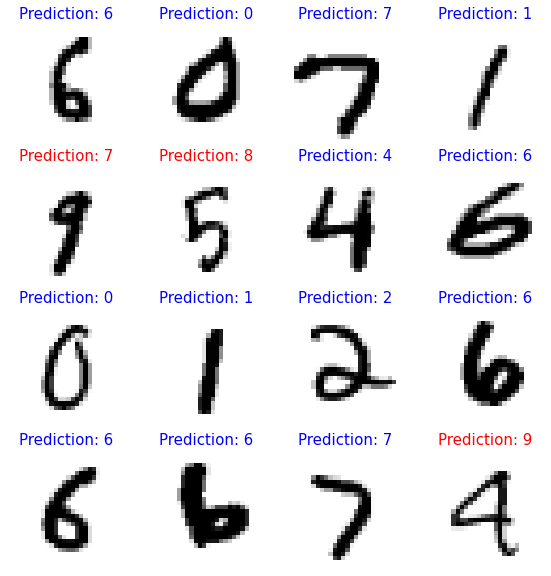

In [42]:
fig, axs = plt.subplots(4,4, figsize=(10, 10))
fig.subplots_adjust(wspace=.001)
axs = axs.ravel()
for i in range(16):
    axs[i].imshow(X_test[i].reshape(28,28),cmap='gray_r')
    y_pred = model.predict(X_test[i].reshape(1,784)).ravel()
    temp = [0]*10
    temp[np.argmax(y_pred)] = 1
    if temp == y_test[i]:
        axs[i].set_title('Prediction: {}'.format(np.argmax(y_pred)), color='blue', fontsize=15)
    else:
        axs[i].set_title('Prediction: {}'.format(np.argmax(y_pred)), color='red', fontsize=15)
    axs[i].set_axis_off()
plt.savefig('images/trained_predictions.jpg',bbox_inches='tight',dpi=400)

In [13]:
import joblib
joblib.dump(model, 'Trained2Network.model')

['Trained2Network.model']